<a href="https://colab.research.google.com/github/deviluthfitaningrum1/breast-cancer-ai-2021/blob/main/Breast_Cancer_KNN_(ipynb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Artificial Intelligent**

Group Assignment


**Team : SandBox**

*   Devi Luthfitaningrum 	(19/440305/TK/48632) | Programmer
*   Diah Ayu Widyati 		(19/444046/TK/49242) | Programmer
*   Tsalis Amalia			(19/444575/TK/49271) | Editor


# **<h2> 1. Import Library dan Dataset**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
import operator

Dataset yang Dipilih

**Dataset Breast Cancer**

In [ ]:
# read_csv dataset 2
# Breast Cancer
url='https://drive.google.com/file/d/17dcr7F13dCRQ7g2-hfb6hEqkfzCPCEXQ/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

cancer = pd.read_csv(dwn_url)
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **<h2> 2. Data Preprocessing**

In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dari info di atas, didapat bahwa dataset breast cancer ini memiliki

*  32 feature
*  569 baris data
*  feature [diagnosis] yang bertipe object (string)
*  feature [Unnamed: 32] yang kosong
*  target = [diagnosis]



**menghapus kolom [id] dan [Unnamed: 32]**

In [ ]:
# menghapus [id] dan [Unnamed: 32]
del cancer['Unnamed: 32']
del cancer['id']
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**mengubah feature [diagnosis] dalam angka  (M=1 dan B=0)**

In [ ]:
# mengubah feature [diagnosis] dalam angka
cancer_dup = cancer.copy()

def classifier(cancer_dup):
    if cancer_dup["diagnosis"]=="M":
        return "1"
    else:
        return "0"
cancer_dup["diagnosis"] = cancer_dup.apply(classifier, axis=1)
cancer_dup.replace([np.inf, -np.inf], np.nan, inplace=True)
cancer_dup["diagnosis"]=pd.to_numeric(cancer_dup["diagnosis"],errors="coerce")
cancer_dup.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**melihat korelasi setiap feature dengan feature lainnya**

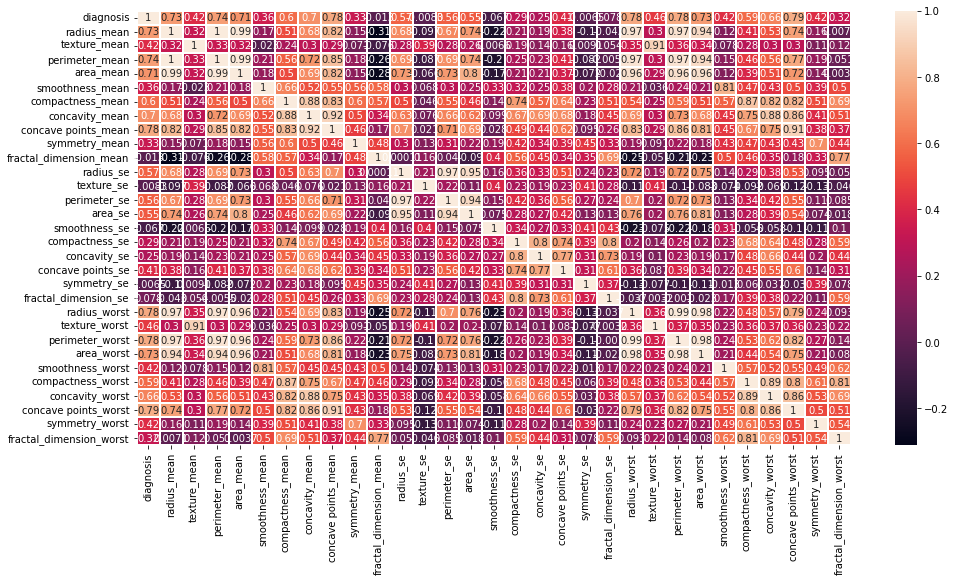

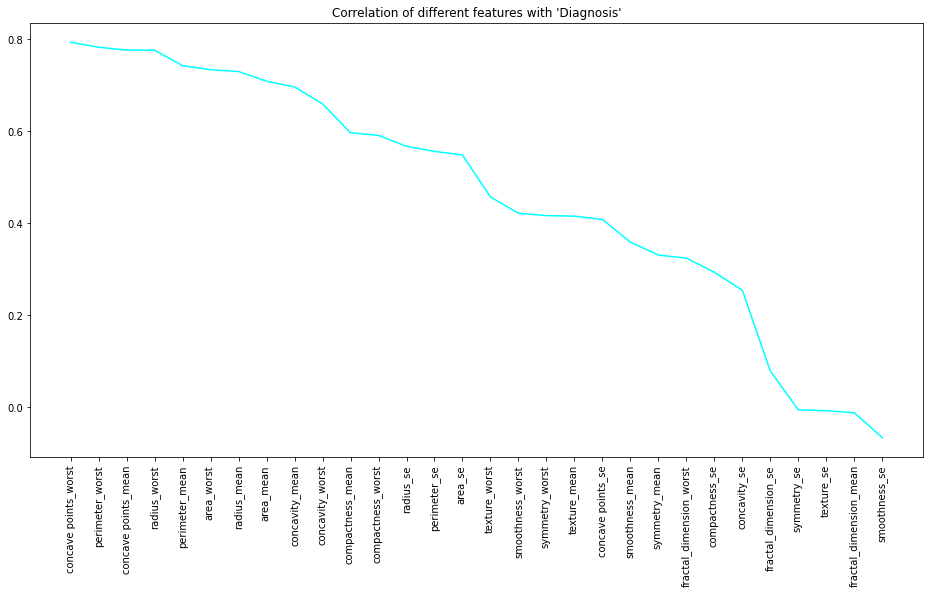

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [ ]:
# melihat korelasi antar feature

plt.figure(figsize=(16,8))
corr=cancer_dup.corr() # menghitung korelasi setiap feature dengan feature lainnya
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

plt.figure(figsize=(16,8))
plt.plot(cancer_dup.corr()['diagnosis'].sort_values(ascending=False)[1:],color="cyan")
plt.title("Correlation of different features with 'Diagnosis'")
plt.xticks(rotation=90)
plt.show()

#Correaltion of features in descending order
print(cancer_dup.corr()['diagnosis'].sort_values(ascending=False))

Dari **Plot Heatmap** terlihat bahwa semakin terang warna kotak, semakin tinggi korelasinya dengan feature diagnosis. begitupun sebaliknya, semakin gelap, semakin kecil korelasinya dengan feature diagnosis

Lalu dari **Plot Correlation** terlihat urutan data mana yang paling terkorelasi dengan feature diagnosis. 5 Feature yang paling terkorelasi dengan diagnosis adalah :
1. concave points_worst
2. perimeter_worst
3. concave points_mean
4. radius_worst
5. perimeter_mean


**Melihat persebaran data pada kelima features utama, apakah diagnosis M dan B sudah rata**

Agar dataset memberikan hasil yang optimal saat di train, dataset harus balanced

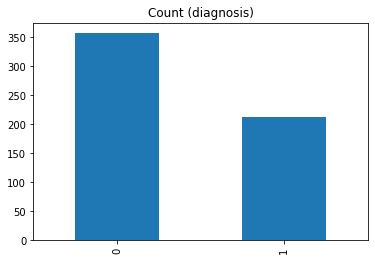

In [ ]:
# data sebelum balanced
cancer_dup.diagnosis.value_counts().plot(kind='bar', title='Count (diagnosis)');

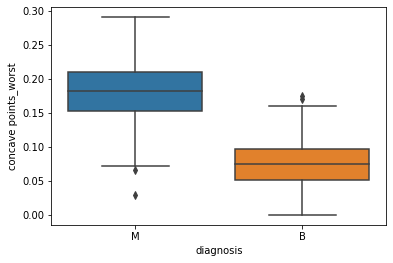

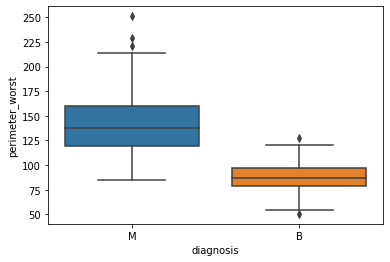

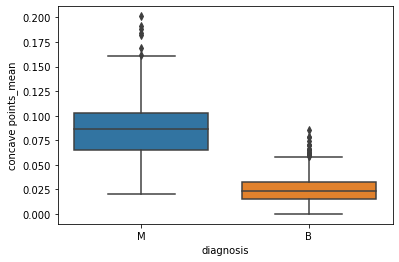

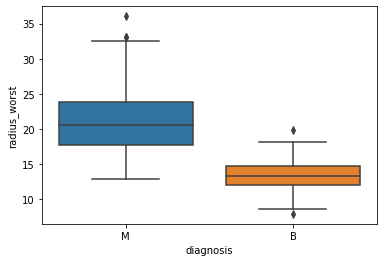

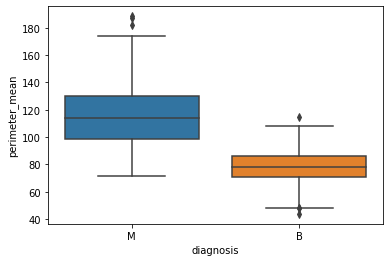

In [ ]:
# Boxplot top 5 corrrelated features

sns.boxplot(data=cancer,x="diagnosis",y="concave points_worst")
plt.show()
sns.boxplot(data=cancer,x="diagnosis",y="perimeter_worst")
plt.show()
sns.boxplot(data=cancer,x="diagnosis",y="concave points_mean")
plt.show()
sns.boxplot(data=cancer,x="diagnosis",y="radius_worst")
plt.show()
sns.boxplot(data=cancer,x="diagnosis",y="perimeter_mean")
plt.show()

ternyata persebaran data belumlah merata, maka dibutuhkan
**undersampling** dan **oversampling**

*   Implementasi **over-sampling** yang paling sederhana adalah dengan menduplikasi baris random dari kelas minoritas (diagnosis : benign)
*   Dalam **under-sampling**, teknik paling sederhana melibatkan penghapusan baris random dari kelas mayoritas (diagnosis : malginant)




In [ ]:
# Class count
count_data_B, count_data_M = cancer_dup.diagnosis.value_counts()

# Divide by class
data_B = cancer_dup[cancer_dup.diagnosis == 0] # Minority (under sampling)
data_M = cancer_dup[cancer_dup.diagnosis == 1] # Majority (over sampling)

**random under-sampling**

In [ ]:
# random undersampling
data_B_under = data_B.sample(count_data_M)
cancer_under = pd.concat([data_B_under, data_M], axis=0)

print('Random under-sampling:')
print(cancer_under.diagnosis.value_counts())

# cancer_under.diagnosis.value_counts().plot(kind='bar', title='Count (diagnosis)');

Random under-sampling:
0    212
1    212
Name: diagnosis, dtype: int64


**random over-sampling**

In [ ]:
data_M_over = data_M.sample(count_data_B, replace=True)
cancer_over = pd.concat([data_B, data_M_over], axis=0)

print('Random over-sampling:')
print(cancer_over.diagnosis.value_counts())

# cancer_over.diagnosis.value_counts().plot(kind='bar', title='Count (diagnosis)');

Random over-sampling:
0    357
1    357
Name: diagnosis, dtype: int64


Random resampling:
0    569
1    569
Name: diagnosis, dtype: int64


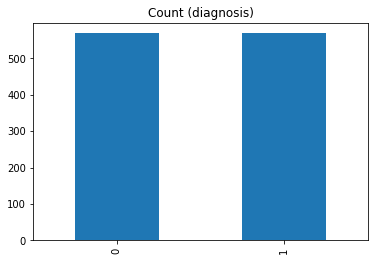

In [ ]:
#New dataset for balanced data
cancer_balanced = pd.concat([cancer_over, cancer_under]).reset_index(drop=True)
#del cancer_balanced['id']

print('Random resampling:')
print(cancer_balanced.diagnosis.value_counts())
cancer_balanced.diagnosis.value_counts().plot(kind='bar', title='Count (diagnosis)');

Karena feature [diagnosis] sudah balanced, maka dataset ini sudah dapat digunakan.

# **3. Feature Selection**

**Feature selection** : feature yang akan digunakan adalah 20 feature yang paling terkorelasi dengan feature [diagnosis]. Hal ini akan membantu meningkatkan akurasi

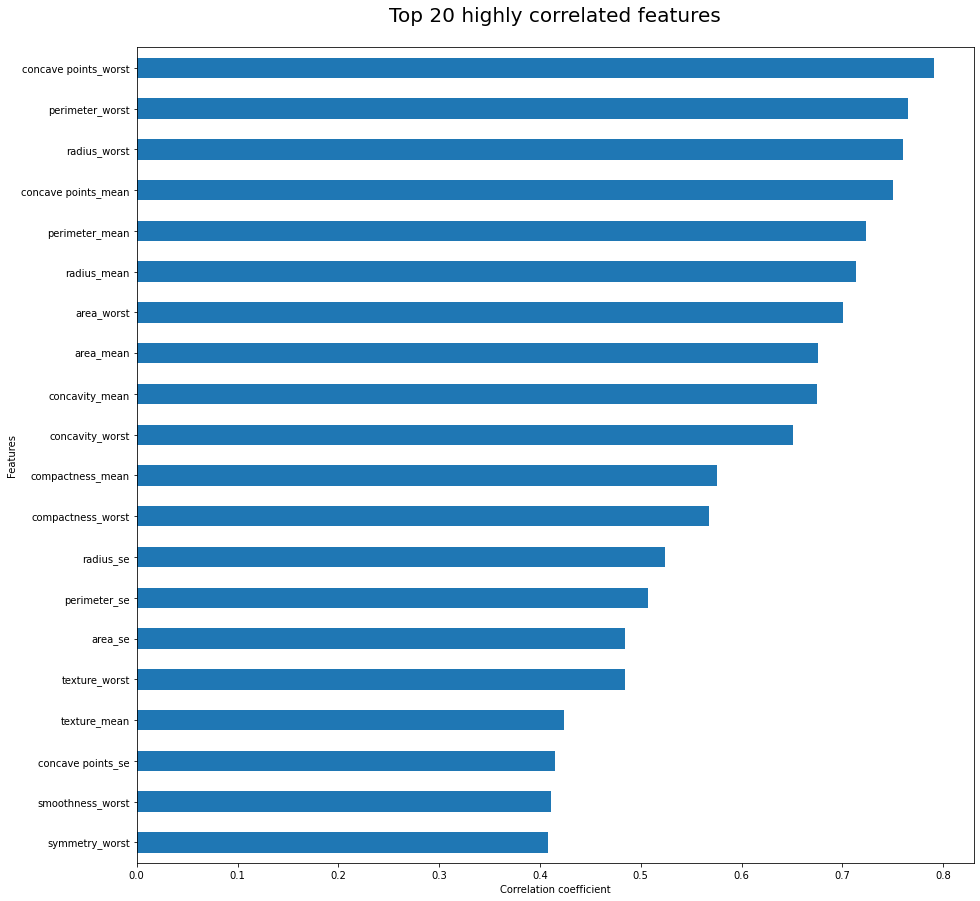

In [ ]:
plt.figure(figsize=(15,15))

# calculating the top 20 highest correlated features
cancer_balanced.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1].plot(kind='barh')

# with respect to the target variable i.e. "quality"
plt.title("Top 20 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

In [ ]:
# Membuat dataset final dengan 20 feature utama
final_index = cancer_balanced.corr().diagnosis.sort_values(ascending=False).iloc[0:21][::-1].index
cancer_final = cancer_balanced[final_index]
X = cancer_final

In [ ]:
# split dataset ke 3 set. Train set, Test set, dan Validation set

indices = list(range(X.shape[0]))
num_training = int(0.7 * X.shape[0])
num_test = int(0.2 * X.shape[0])
num_validate = int(0.1 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:num_training]
test_indices = indices[num_training:num_training+num_test]
validate_indices = indices[num_training+num_test:]

train_final = cancer_final.iloc[train_indices].reset_index().drop(["index"],axis=1)
validate_final = cancer_final.iloc[validate_indices].reset_index().drop(["index"],axis=1)
test_final = cancer_final.iloc[test_indices].reset_index().drop(["index"],axis=1)

train_final = train_final.astype(float).values.tolist()
validate_final = validate_final.astype(float).values.tolist()
test_final = test_final.astype(float).values.tolist()

train_set={0:[],1:[]}
test_set={0: [],1:[]}
validate_set={0:[],1: []}
for i in train_final:
  train_set[i[-1]].append(i[:-1]) # appending list to last element
for i in test_final:
  test_set[i[-1]].append(i[:-1])
for i in validate_final:
  validate_set[i[-1]].append(i[:-1])

# **4. Machine Learning Metode KNN**

Membuat model machine learning metode KNN dengan menggunakan train set dan test set.

In [ ]:
# Membuat fungsi train model denagn metode KNN
def knn(data,predict,k):
  distances=[]
  for group in data:
    for features in data[group]:
      euclidean_distance = math.sqrt((features[0]-predict[0])**2 + (features[1]-predict[1])**2) #jarak
      distances.append([euclidean_distance, group])
  votes=[i[1] for i in sorted(distances)[:k]] #tetangga
  vote_result=Counter(votes).most_common(1)[0][0]
  return vote_result

In [ ]:
# Menggunakan fungsi knn dalam train model
# set yang dipakai untuk train model : train_set dan validate_set

k_range=range(1,10)
correct = 0
total = 0
max_accuracy = 0.0
optimal_k = 0
accuracy = 0.0
accuracies = []
for k in k_range:
  for group in validate_set:
    for data in validate_set[group]:
      vote=knn(train_set,data,k)
      if group==vote:
        correct+=1
      total+=1
      accuracy = correct/total #akurasi
  print("Accuracy dengan k =", k, " : ", accuracy)
  if max_accuracy < accuracy:
    max_accuracy = accuracy
    optimal_k = k
  accuracies.append(accuracy)

Accuracy dengan k = 1  :  0.8869565217391304
Accuracy dengan k = 2  :  0.8869565217391304
Accuracy dengan k = 3  :  0.8318840579710145
Accuracy dengan k = 4  :  0.8239130434782609
Accuracy dengan k = 5  :  0.8208695652173913
Accuracy dengan k = 6  :  0.8188405797101449
Accuracy dengan k = 7  :  0.8099378881987578
Accuracy dengan k = 8  :  0.808695652173913
Accuracy dengan k = 9  :  0.7990338164251207


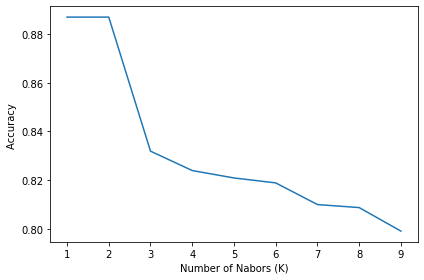

In [ ]:
# visualisasi hasil dari penjalanan code sebelumnya

plt.plot(k_range,accuracies)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Test Model tersebut dengan test set

In [ ]:
for group in test_set:
    for data in test_set[group]:
        vote=knn(test_set,data,optimal_k)
        if group==vote:
            correct+=1
        total+=1
        accuracy=correct/total
print('Accuracy: ', accuracy)
print('max accuracy: ', max_accuracy)
print('optimal k: ', optimal_k)

Accuracy:  0.8351822503961965
max accuracy:  0.8869565217391304
optimal k:  1


# **5. Kesimpulan**

Dari dataset tentang breast cancer yang diberikan, kelompok kami telah merancang sebuah program yang bertujuan menggolongkan apakah tumor yang dialami oleh seorang penderita merupakan tumor jinak (benign) atau tumor ganas (malignant). Dengan menggunakan metode K-Nearest Neighbor, **dengan k=1**, diperoleh akurasi yang didapatkan untuk melakukan prediksi tersebut adalah mendekati **0.912 atau 91.2%.**